In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

N = 150
x = 6*np.random.rand(N,1) - 3
y = 0.3 * x**3 - 0.5 * x**2 + x + 2 + np.random.randn(N,1)

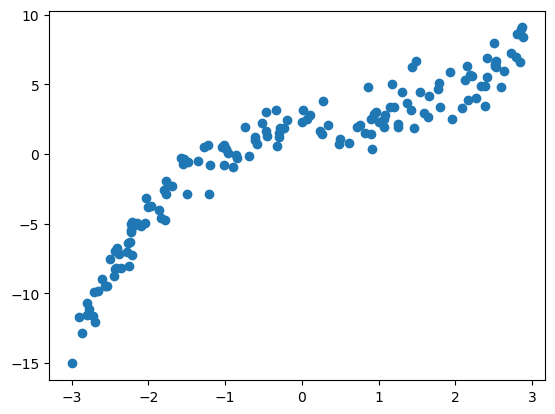

In [2]:
plt.plot(x,y, 'o')

In [3]:
#w = A^(-1)y

a = np.matrix([[N, sum(x)[0]], [sum(x)[0], sum(x**2)[0]]])

a_1 = np.matrix.getI(a)

y_r = np.matrix([[sum(y)[0]], [sum(y*x)[0]]])

In [4]:
a

matrix([[150.        , -25.05119278],
        [-25.05119278, 503.5693487 ]])

In [5]:
a_1

matrix([[0.00672252, 0.00033443],
        [0.00033443, 0.00200246]])

In [6]:
y_r

matrix([[ -17.37553455],
        [1357.28646671]])

In [7]:
w_matrix = np.matmul(a_1, y_r)

In [8]:
w_matrix

matrix([[0.33710568],
        [2.71210186]])

In [9]:
w = np.array(w_matrix)

x_test = np.arange(-3,3,0.25)
y_test = w[1][0]*x_test + w[0][0]

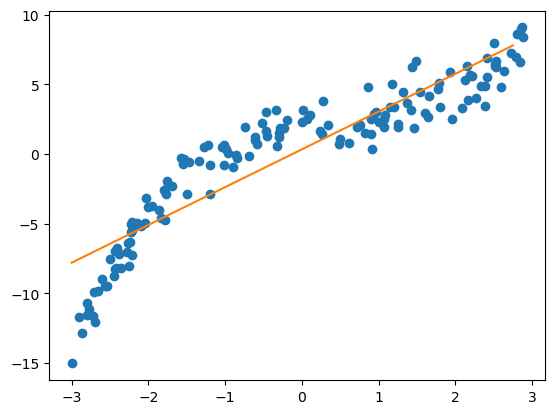

In [10]:
plt.plot(x,y, 'o')
plt.plot(x_test, y_test)

In [11]:
def polinomial_regression(degree, x, y):
    l = []
    a_arr = []
    y_r = []

    #A
    #Lines
    for i in range(degree + 1):
        #Rows
        l = []
        for j in range(degree + 1):
            if i == 0 and j == 0:
                l.append(N)
            else:
                l.append(sum(x**(i+j))[0])
        a_arr.append(l)

    a = np.matrix(a_arr)
    a_1 = np.matrix.getI(a)

    #Y
    for i in range(degree + 1):
        y_r.append([sum(y*x**i)[0]])

    w_matrix = np.matmul(a_1, y_r)

    return w_matrix     

In [12]:
test = polinomial_regression(2, x, y)

In [13]:
w_test = np.array(test)

x_test = np.arange(-3,3,0.25)
y_test = w_test[2][0]*x_test**2 + w_test[1][0]*x_test + w_test[0][0]

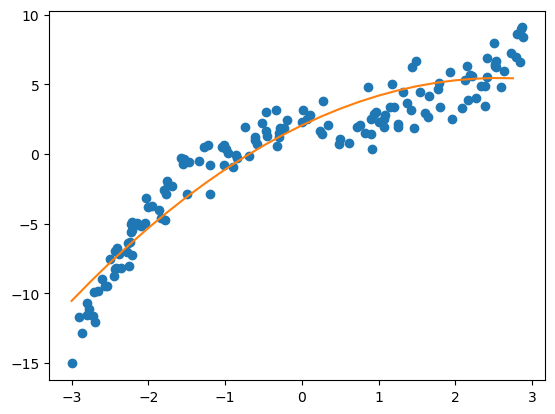

In [14]:
plt.plot(x,y, 'o')
plt.plot(x_test, y_test)

In [15]:
def mse(degree, x, y, w):
    n = len(x)

    y_regression = 0
    for i in range(len(w)):
        y_regression += w[i][0] * x**i

    s = np.sum((y - y_regression)**2)

    return s/n

In [16]:
def calculate_poli(x_data, w):
    x = np.arange(min(x_data),(max(x_data)),0.25)
    y = 0
    for i in range(len(w)):
        y += w[i][0] * x**i

    return x, y

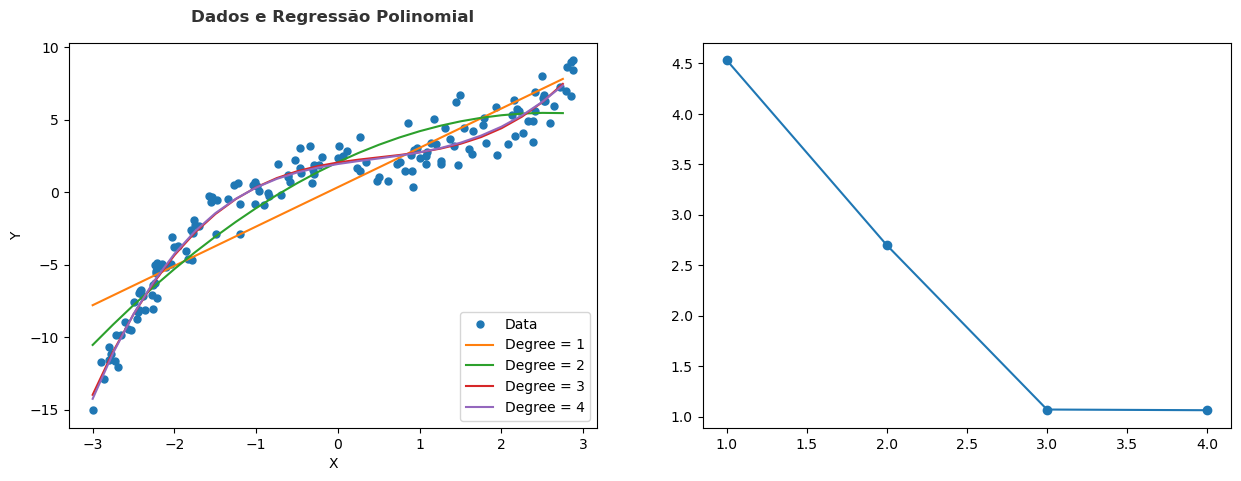

In [17]:
degree = 5

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figwidth(15)
fig.set_figheight(5)

ax1.plot(x,y, 'o', markersize=5, label='Data')

error = []
error_x = []

for i in range(1,degree):
    pol = polinomial_regression(i, x, y)

    w_pol = np.array(pol)

    x_pol , y_pol = calculate_poli(x, w_pol)

    error.append(mse(i, x, y, w_pol))
    error_x.append(i)

    s = 'Degree = '+str(i)
    ax1.plot(x_pol, y_pol, label=s)


ax2.plot(error_x, error, '-o')

ax1.set(xlabel='X', ylabel='Y')
ax1.set_title('Dados e Regressão Polinomial',
          pad=15, color='#333333', weight='bold')
ax1.legend(loc='lower right')

In [ ]:
# df = pd.read_csv('housing.csv')

# def frac(dataframe, fraction, other_info=None):
#     """Returns fraction of data"""
#     return dataframe.sample(frac=fraction)

# df_1 = frac(df, 0.01)

# x = df_1['median_income']
# y = df_1['median_house_value']